## 1. Import Libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
teilm021_cleaned = pd.read_csv('../data/cleaned/teilm021_cleaned.csv')
teilm021_cleaned.head()

,s_adj,age,sex,unit,geo_time,2019M09,2019M10,2019M11,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08
0,SA,Y_LT25,F,PC_ACT,AT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SA,Y_LT25,F,PC_ACT,BE,11.8,13.2,13.2,13.2,13.0,13.0,13.0,13.8,13.8,13.8,NaN,NaN
2,SA,Y_LT25,F,PC_ACT,BG,6.9,7.1,7.2,7.3,10.1,11.2,11.6,14.8,13.1,10.7,9.6,NaN
3,SA,Y_LT25,F,PC_ACT,CH,8.4,8.2,8.1,7.9,7.2,6.8,7.3,8.2,8.7,8.4,NaN,NaN
4,SA,Y_LT25,F,PC_ACT,CY,13.8,14.2,14.2,14.2,11.1,11.1,11.1,18.4,18.4,18.4,NaN,NaN


In [3]:
teilm022_cleaned = pd.read_csv('../data/cleaned/teilm022_cleaned.csv')
teilm022_cleaned.head()

,s_adj,age,sex,unit,geo_time,2019M09,2019M10,2019M11,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08
0,SA,Y25-74,F,PC_ACT,AT,3.7,3.8,3.7,3.7,3.7,3.6,3.7,4.0,4.2,4.1,3.9,NaN
1,SA,Y25-74,F,PC_ACT,BE,4.3,4.1,3.9,3.9,4.1,4.2,4.4,4.5,4.4,4.4,4.4,NaN
2,SA,Y25-74,F,PC_ACT,BG,3.5,3.6,3.6,3.5,3.8,3.6,3.6,4.2,4.0,3.9,3.9,NaN
3,SA,Y25-74,F,PC_ACT,CH,4.0,3.8,3.6,3.7,4.0,4.1,4.1,4.0,4.1,4.2,NaN,NaN
4,SA,Y25-74,F,PC_ACT,CY,7.0,6.8,6.6,6.3,6.0,5.6,5.9,7.3,7.3,6.1,5.3,NaN


## 2. Merge Files

In [4]:
teilm021_022_concat = pd.concat([teilm021_cleaned, teilm022_cleaned], axis = 0)
teilm021_022_concat.head()

,s_adj,age,sex,unit,geo_time,2019M09,2019M10,2019M11,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08
0,SA,Y_LT25,F,PC_ACT,AT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SA,Y_LT25,F,PC_ACT,BE,11.8,13.2,13.2,13.2,13.0,13.0,13.0,13.8,13.8,13.8,NaN,NaN
2,SA,Y_LT25,F,PC_ACT,BG,6.9,7.1,7.2,7.3,10.1,11.2,11.6,14.8,13.1,10.7,9.6,NaN
3,SA,Y_LT25,F,PC_ACT,CH,8.4,8.2,8.1,7.9,7.2,6.8,7.3,8.2,8.7,8.4,NaN,NaN
4,SA,Y_LT25,F,PC_ACT,CY,13.8,14.2,14.2,14.2,11.1,11.1,11.1,18.4,18.4,18.4,NaN,NaN


In [5]:
teilm021_cleaned.shape

(116, 17)

In [6]:
teilm022_cleaned.shape

(115, 17)

In [7]:
teilm021_022_concat.shape

(231, 17)

In [8]:
cols = ['2019M09','2019M10', '2019M11', '2019M12', '2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06', '2020M07', '2020M08']
teilm021_022_concat['mean'] = teilm021_022_concat[cols].mean(axis=1)


In [9]:
teilm021_022_concat['mean'].value_counts().sort_values(ascending = False)

6.663636     3
6.281818     3
7.063636     2
16.000000    2
5.720000     2
            ..
8.963636     1
6.154545     1
10.818182    1
3.275000     1
12.170000    1
Name: mean, Length: 215, dtype: int64

## 3. Save New CSV

In [10]:
teilm021_022_concat.to_csv('../data/cleaned/teilm021_022_concat.csv')

In [27]:
teilm021_022_concat_2 = teilm021_022_concat[['age', 'sex', 'geo_time', 'mean']]
teilm021_022_concat_2

,age,sex,geo_time,mean
0,Y_LT25,F,AT,NaN
1,Y_LT25,F,BE,13.180000
2,Y_LT25,F,BG,9.963636
3,Y_LT25,F,CH,7.920000
4,Y_LT25,F,CY,14.490000
...,...,...,...,...
110,Y25-74,T,SI,4.027273
111,Y25-74,T,SK,5.354545
112,Y25-74,T,TR,11.200000
113,Y25-74,T,UK,2.688889


In [30]:
teilm021_022_concat_3 = teilm021_022_concat_2[teilm021_022_concat_2['sex'] == 'T']
teilm021_022_concat_3

,age,sex,geo_time,mean
76,Y_LT25,T,AT,10.145455
77,Y_LT25,T,BE,13.300000
78,Y_LT25,T,BG,10.818182
79,Y_LT25,T,CH,8.500000
80,Y_LT25,T,CY,16.160000
...,...,...,...,...
110,Y25-74,T,SI,4.027273
111,Y25-74,T,SK,5.354545
112,Y25-74,T,TR,11.200000
113,Y25-74,T,UK,2.688889


In [48]:
country_index = teilm021_022_concat_3.groupby('geo_time').mean()
country_index.sort_values('mean', ascending = False).reset_index().round()

,geo_time,mean
0,EL,25.0
1,ES,24.0
2,IT,18.0
3,TR,18.0
4,SE,14.0
5,LU,13.0
6,FR,13.0
7,PT,13.0
8,HR,12.0
9,FI,12.0


In [100]:
country_index2 = country_index.nlargest(10, 'mean').round()
country_index2

,mean
geo_time,
EL,25.0
ES,24.0
IT,18.0
TR,18.0
SE,14.0
LU,13.0
FR,13.0
PT,13.0
HR,12.0


In [99]:
x = country_index2['geo_time'].set_index('geo_time')
x

AttributeError: 'Series' object has no attribute 'set_index'

ConversionError: Failed to convert value(s) to axis units: ['EL', 'ES', 'IT', 'TR', 'SE', 'LU', 'FR', 'PT', 'HR', 'FI']

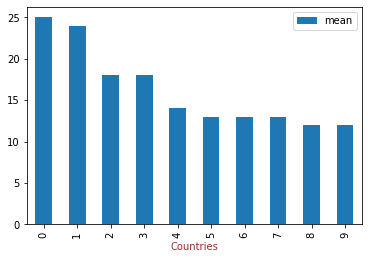

In [98]:
country_index2.plot(kind = 'bar')
plt.xlabel ('Countries', color = 'brown')
plt.xticks (x)
plt.ylabel('Unemployment %', color = 'brown')
plt.title('Top 10 Harmonized Unemployment Rate %')
plt.show();